In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [2]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [3]:
all_files = ["Data/71.csv", "Data/1.csv", "Data/11.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
         "Data/25.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/36.csv", 
         "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv", 
         "Data/51.csv", "Data/54.csv", "Data/56.csv", "Data/59.csv",  
         "Data/63.csv", "Data/67.csv", "Data/68.csv", "Data/70.csv", "Data/72.csv", 
         "Data/76.csv", "Data/79.csv", 
         "Data/80.csv", "Data/82.csv", "Data/91.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",

In [4]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit

    df1 = get_frequencies(last_digits)


    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies
        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [5]:
# df3 = None
# first = True
# i = 1
# for file in files2:
#     print(i)
#     i += 1
#     data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
#     last_digits = [] #
#     last_digit_dict = {}
#     last_digit_freq = {}

#     for column in data:
#         nums = data[column]
#         last_digit = [first_after_decimal(num) for num in nums]
#         #last_digit = [first_digit(num) for num in nums]
#         last_digits += last_digit
#         last_digit_dict[column] = last_digit

#     df1 = pd.Series(last_digits).value_counts().sort_index().reset_index().reset_index(drop=True)


#     for key in last_digit_dict.keys():
#         frequencies = pd.Series(last_digit_dict[key]).value_counts().sort_index().reset_index().reset_index(drop=True)
#         frequencies.columns = ['Element', 'Frequency']
#         frequencies['Percentage'] = frequencies['Frequency'] / sum(frequencies['Frequency']) * 100
#         last_digit_freq[key] = frequencies
#         message = (f"{key}"
#         f"{frequencies}"
#         f"")
#         #print(message)

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df3 = df1[['Element', 'Percentage']].copy()
#         df3.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df3[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

In [6]:
# df2 = df2.set_index('Element')
df2 = df2.drop([0])
print(df2)

   Data/71.csv  Data/1.csv  Data/11.csv  Data/14.csv  Data/19_SHORT.csv  \
1    37.274236   32.356735    31.153604    34.905660           9.848485   
2     7.551003   17.818316    19.570349    20.518868          12.878788   
3     8.028591   12.244334    13.495436    10.613208          16.666667   
4     8.222180    8.853879     8.915644     8.254717          33.333333   
5     8.153041    7.729869     6.869688     5.660377          11.363636   
6     8.238135    6.679565     6.027699     5.896226           4.545455   
7     7.769056    5.150175     4.674221     6.132075           6.060606   
8     7.687153    4.873779     4.650614     3.773585           2.272727   
9     7.076606    4.293348     4.642745     4.245283           3.030303   

   Data/22.csv  Data/25.csv  Data/32_LETTER.csv  Data/34.csv  Data/36.csv  \
1    29.919117    29.578818           30.928891    30.181455    27.274979   
2    18.012133    17.303424           17.094192    18.461795    19.323582   
3    12.568051    

In [7]:
# df3 = df3.set_index('Element')
# print(df3)

In [8]:
# transposed = df2.transpose()[1:].copy()

In [9]:
# plt.boxplot(df3, sym="r.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# # plt.ylim(0, 45)
# plt.ylabel("Frequency (percentage)")
# plt.xlabel("Digit")
# plt.title("Digit frequency of first number after decimal")
# plt.show()

In [10]:
df4 = pd.DataFrame(df2).T.stack().reset_index()#.drop(columns=['level_1'])
df4 = df4.rename(columns={0: "Frequency (percentage)", "level_1": "Digit"})
print(df4)

         level_0  Digit  Frequency (percentage)
0    Data/71.csv      1               37.274236
1    Data/71.csv      2                7.551003
2    Data/71.csv      3                8.028591
3    Data/71.csv      4                8.222180
4    Data/71.csv      5                8.153041
..           ...    ...                     ...
265  Data/91.csv      5                8.115314
266  Data/91.csv      6                6.823594
267  Data/91.csv      7                6.001590
268  Data/91.csv      8                5.258902
269  Data/91.csv      9                4.636390

[270 rows x 3 columns]


In [11]:
# df5 = pd.DataFrame(df3).T.stack().reset_index()#.drop(columns=['level_1'])
# print(df5.head(15))

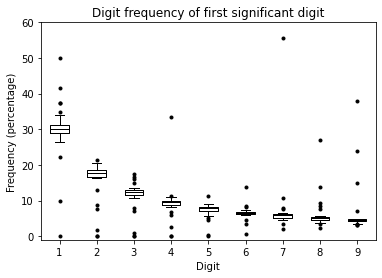

In [18]:
plt.boxplot(df2, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 60)
plt.ylabel("Frequency (percentage)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('Data/fig1a', dpi=300)
plt.show()

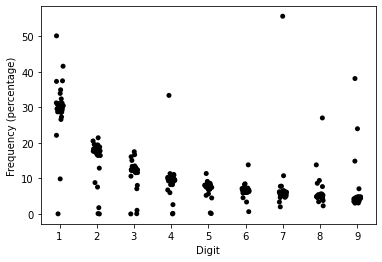

In [13]:
import seaborn as sns
sns.stripplot(x = 'Digit', y = 'Frequency (percentage)', data = df4, jitter=True, color = 'black')
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')
# sns.despine()

In [14]:
# sns.stripplot(x = 'Element', y = 0, data = df4, jitter=True, color = 'black')


In [15]:
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')